# PROJECT TOPIC - AUTOENCODER FOR IMAGE DENOISING
## AIM - Implement a convolutional autoencoder to remove noise from images. Use the MNIST dataset for training and testing

## Introduction:
### Autoencoders are a neural network architecture, designed more to be learned in an unsupervised manner. The model learns mapping and compression of the data into lower-dimensional space so that they can reconstruct the input back into the same form. Autoencoders, therefore, can easily be used for training at this stage of compression-reconstruction cycle, which makes them suitable for tasks like dimensionality reduction, feature extraction, and noise removal because the autoencoder is not dependent upon explicit labeling.

### Denoising Autoencoders is a special variant type that aims to remove noise from the data. Here, the target would be clean or noise-free data in contrast to input data, which was corrupted by the presence of noise. At the training phase, the autoencoder learns this clean version of the reconstructed data and thus "denoises" it. Typically, this methodology would be called self-supervised learning because, though the model is no longer reliant on external labels, it would then be generating its own "supervision" as it learns how to reconstruct clean data from noisy data. This architecture is especially common in image processing because noise may obscure crucial information.

### The encoding stage of a denoising autoencoder compresses information while the decoding stage that reconstructs a more complete version of the input. For images, Convolutional Denoising Autoencoders (CDAEs) are used since convolutional layers capture hierarchical and spatial patterns significant in reconstructing high-quality noise-free images. In this manner, it is not just the autoencoder learning to remove noise but enhancing the core features of data, so it is convenient in some applications, from medical imaging, quality control, to other aspects.


## Importing libraries

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

## Loaidng Mnist data

In [ ]:
(X_train , _) ,(X_test, _) = mnist.load_data()

# checking the shape of training data to verify if the dataset has been loaded correctly
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

## Visualise the dataset using matplotlib

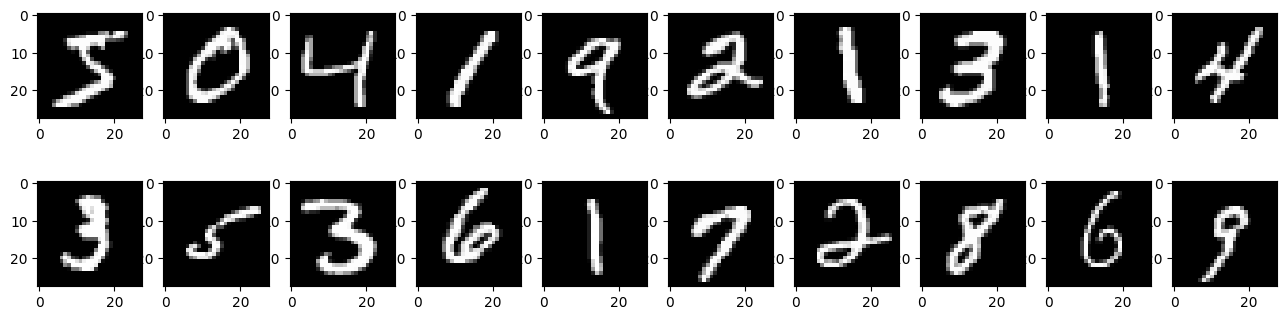

In [ ]:
fig, axes = plt.subplots(2,10, figsize = (16, 4))

count = 0

# for every row and every column of a row, plotting an image
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train[count], cmap = 'gray')
        count+=1

## Normalize the data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Adding noise to data(preparing the source data)

In [ ]:
# noise_factor is used to decide how much noise we are going to add in the data(0.1 means 10% of noise is being added, rest 90% data is as it is)
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

In [ ]:
# checking the shape after adding the noise(the shape should be same as it was before adding the noise)
X_train.shape

(60000, 28, 28)

## Visualise the noisy data

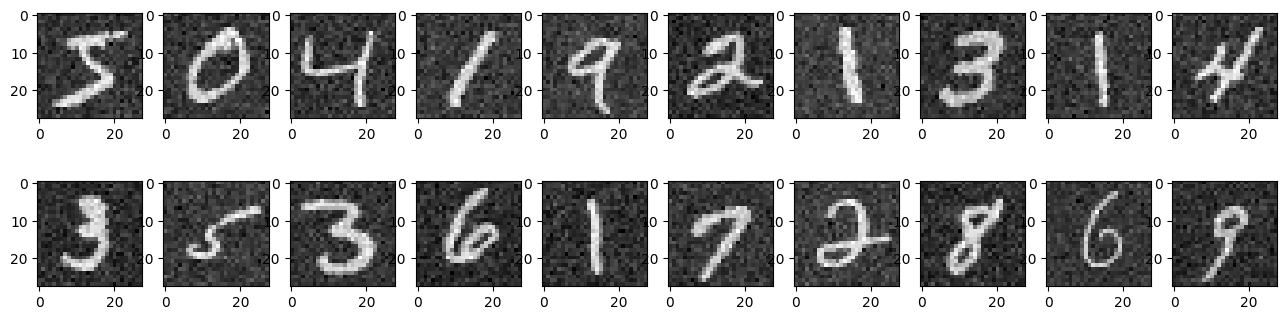

In [ ]:
fig, axes = plt.subplots(2,10, figsize = (16,4))

count = 0
for i in range(2):
    for j in range(10):
        axes[i,j].imshow(X_train_noise[count], cmap = 'gray')
        count+=1

## Reshape images


In [ ]:
# the dataset contains 2d images and to fit in CNN, we have to convert it into 3d tensor
X_train = X_train.reshape(X_train.shape[0], 28 ,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28 ,28, 1)
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28,28,1)

X_train.shape, X_train_noise.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

## Defining the model using functional api


In [ ]:
# encoder
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

# decoder
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')

In [ ]:
# checking model summary
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)    

## Model compilation and summary

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')
history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 10, validation_split = 0.25, verbose = 2)

Epoch 1/10
352/352 - 25s - loss: 0.1616 - val_loss: 0.2774 - 25s/epoch - 71ms/step
Epoch 2/10
352/352 - 22s - loss: 0.0760 - val_loss: 0.0749 - 22s/epoch - 63ms/step
Epoch 3/10
352/352 - 22s - loss: 0.0732 - val_loss: 0.0739 - 22s/epoch - 62ms/step
Epoch 4/10
352/352 - 22s - loss: 0.0720 - val_loss: 0.0762 - 22s/epoch - 62ms/step
Epoch 5/10
352/352 - 22s - loss: 0.0710 - val_loss: 0.0712 - 22s/epoch - 62ms/step
Epoch 6/10
352/352 - 22s - loss: 0.0702 - val_loss: 0.0718 - 22s/epoch - 63ms/step
Epoch 7/10
352/352 - 22s - loss: 0.0698 - val_loss: 0.0699 - 22s/epoch - 63ms/step
Epoch 8/10
352/352 - 21s - loss: 0.0694 - val_loss: 0.0698 - 21s/epoch - 61ms/step
Epoch 9/10
352/352 - 21s - loss: 0.0690 - val_loss: 0.0695 - 21s/epoch - 60ms/step
Epoch 10/10
352/352 - 22s - loss: 0.0687 - val_loss: 0.0705 - 22s/epoch - 62ms/step


## Saving model weights

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
autoencoder.save_weights('/content/drive/MyDrive/DeepLearningModels/autoencoder_model_weights.h5')

Mounted at /content/drive


In [ ]:
# defining a function to visualise the data
def visualize_data(data, row, column):
    data = data.reshape(data.shape[0], 28,28)
    count = 0
    fig, axes = plt.subplots(row, column, figsize = (16,4))
    for i in range(row):
        for j in range(column):
            axes[i,j].imshow(data[count], cmap = 'gray')
            count+=1

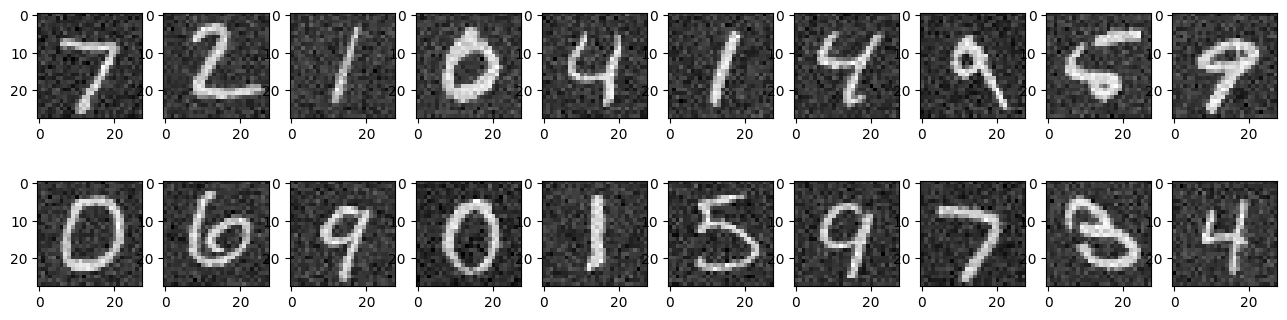

In [ ]:
# visualising a part of test data
visualize_data(X_test_noise[:20], 2,10)

## Making predictions on test data

In [ ]:
pred = autoencoder.predict(X_test_noise[:20])
pred.shape

1/1 [==============================] - 0s 134ms/step


(20, 28, 28, 1)

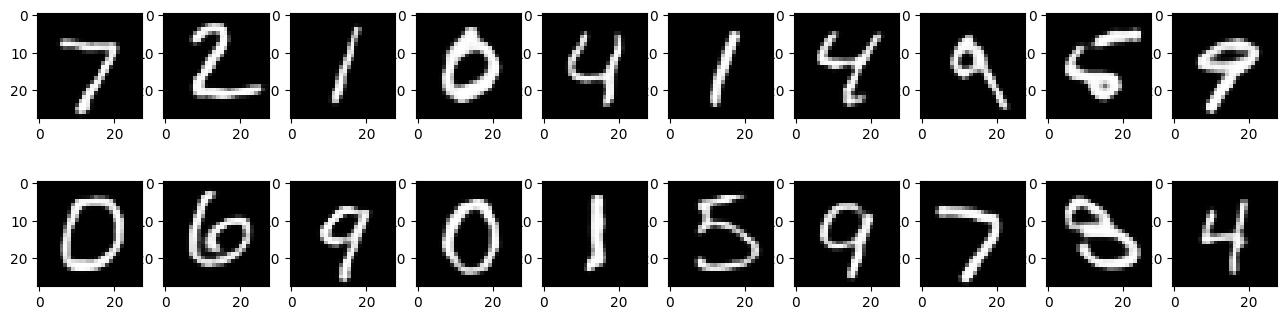

In [ ]:
# visualising the predictions for train data
visualize_data(pred, 2, 10)

## Result and Conclusion:
### In this project, a Convolutional Denoising Autoencoder is implemented to remove effective noise in images belonging to the MNIST dataset. Here, the objective was that the model learned to reconstruct clean images from their noisy counterpart by capturing a compressed representation that could be used for its restoration through decoding. The architecture used convolutional layers that capture spatial details; isolating important features, and hence eliminating the noise there, made it a good suitability of such a model for denoising tasks in visual data.

### The training phase involved feeding noisy images as an input and retaining clean images as the output target. This is self-supervised learning; hence, there is no need for any external labels to train the model. During training, MSE has been used as the loss function in order to quantify the pixel-wise difference between the original clean images and the reconstructed images. Generally, lower MSE values indicated that the model was well fitted to learn in a way of removing noise and reconstructing the images with very high fidelity.

### After several epochs of training, it was impressive to see how much improvement the model obtained in reconstruction, where images were restored with clear, recognizable digits, and noise was effectively removed. Two other metrics used in determining the quality of denoising are PSNR and SSIM. Higher PSNR and SSIM values across test images confirmed that the autoencoder was able to learn to preserve all the important details and textures while minimizing noise.

### Important Takeaways

### • Denoising Capacity: the system was proved to have good capability for recovery of well visible images, hence explaining efficiency of convolutional layers while doing spatially-aware denoising.
### • Self-Supervised Learning: the autoencoder relied on self-supervision based on letting the noisy input to have the noisy image as an input and using the clean image as the target, thereby posing a really workable approach for unsupervised learning tasks.
### • Potential Applications: Since this autoencoder is efficient in removing noise, it might find utility in most domains where quality restoration of images is an essential aspect of the problem space, including applications as broad as medical imaging-for example, removal of artifacts from scans-and denoising of satellite images, to enhancement of images taken under low light conditions.

### In general, the implementation of a denoising autoencoder in this project has been successful in learning reconstruction of noise-free images from noisier inputs. This result points to the usefulness of denoising autoencoders in applications requiring high-fidelity image reconstruction-the scientific and real-world applications, for instance, will appreciate such a tool.